Defaulting to user installation because normal site-packages is not writeable
===== SENTIMENT ANALYSIS RESULTS =====
                                            text  \
0           I love this product, it works great!   
1  This is the worst experience I have ever had.   
2       It's okay, not too good and not too bad.   
3         Absolutely fantastic, I am very happy.   
4              I am disappointed and frustrated.   

                                     clean_text  compound sentiment_label  
0            i love this product it works great    0.8519        Positive  
1  this is the worst experience i have ever had   -0.6249        Negative  
2         its okay not too good and not too bad    0.3278        Positive  
3          absolutely fantastic i am very happy    0.8354        Positive  
4              i am disappointed and frustrated   -0.7579        Negative  


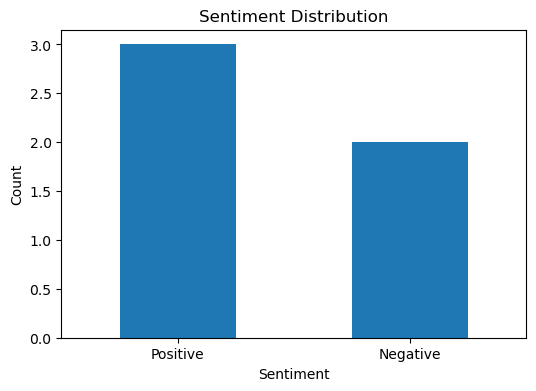


Input Text: I really love this movie, it was amazing!
Cleaned: i really love this movie it was amazing
Scores: {'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.8516}
Predicted Sentiment: Positive

Input Text: This is the worst thing ever, I hate it.
Cleaned: this is the worst thing ever i hate it
Scores: {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.8316}
Predicted Sentiment: Negative

Input Text: It's okay, nothing special.
Cleaned: its okay nothing special
Scores: {'neg': 0.367, 'neu': 0.325, 'pos': 0.309, 'compound': -0.092}
Predicted Sentiment: Negative


In [1]:
# ============================================================
# TASK 3 – SENTIMENT ANALYSIS USING NLTK (SINGLE CLEAN CELL)
# ============================================================

# Install required library
!pip install nltk

# ---------------------------
# Imports
# ---------------------------
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

# ---------------------------
# Download NLTK data quietly
# ---------------------------
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# ---------------------------
# Sample dataset (replace with your file path if needed)
# ---------------------------
sample_texts = [
    "I love this product, it works great!",
    "This is the worst experience I have ever had.",
    "It's okay, not too good and not too bad.",
    "Absolutely fantastic, I am very happy.",
    "I am disappointed and frustrated."
]

df = pd.DataFrame({"text": sample_texts})
text_column = "text"

# ---------------------------
# TEXT CLEANING FUNCTIONS
# ---------------------------
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text): 
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df["clean_text"] = df[text_column].astype(str).apply(clean_text)
df["clean_text_no_stop"] = df["clean_text"].apply(remove_stopwords)

# ---------------------------
# SENTIMENT ANALYSIS (VADER)
# ---------------------------
sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return sia.polarity_scores(text)

sentiment_scores = df["clean_text"].apply(get_sentiment_scores)
sentiment_df = sentiment_scores.apply(pd.Series)

df = pd.concat([df, sentiment_df], axis=1)

# ---------------------------
# ADD SENTIMENT LABEL
# ---------------------------
def label_sentiment(compound, pos_thresh=0.05, neg_thresh=-0.05):
    if compound >= pos_thresh:
        return "Positive"
    elif compound <= neg_thresh:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["compound"].apply(label_sentiment)

# ---------------------------
# DISPLAY RESULTS
# ---------------------------
print("===== SENTIMENT ANALYSIS RESULTS =====")
print(df[[text_column, "clean_text", "compound", "sentiment_label"]])

# ---------------------------
# VISUALIZATION
# ---------------------------
sentiment_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# ---------------------------
# CUSTOM SENTENCE TESTER
# ---------------------------
def predict_sentiment(text):
    clean = clean_text(text)
    scores = sia.polarity_scores(clean)
    label = label_sentiment(scores["compound"])
    print("\nInput Text:", text)
    print("Cleaned:", clean)
    print("Scores:", scores)
    print("Predicted Sentiment:", label)

# Test examples
predict_sentiment("I really love this movie, it was amazing!")
predict_sentiment("This is the worst thing ever, I hate it.")
predict_sentiment("It's okay, nothing special.")
